In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ve barplot cho tips, nhom time, du lieu total_bill
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


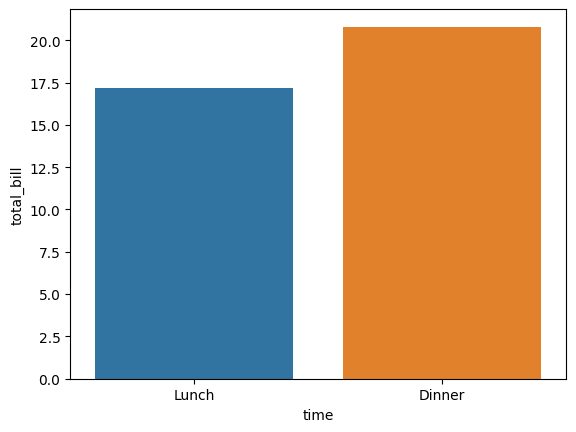

In [12]:
sns.barplot(data=tips, x='time', y='total_bill', errorbar=None, hue='time'); 
                                                                 #Vẽ barplot với biến định lượng là total bill, biến phân loại là time
                                                                 #Mặc định nó sẽ lấy trung bình cộng total_bill của mỗi nhóm để  vẽ
                                                                 #errorbar=None để không hiển thị khoảng tin cậy
                                                                 #hue='time' để tô màu hai nhóm khác nhau

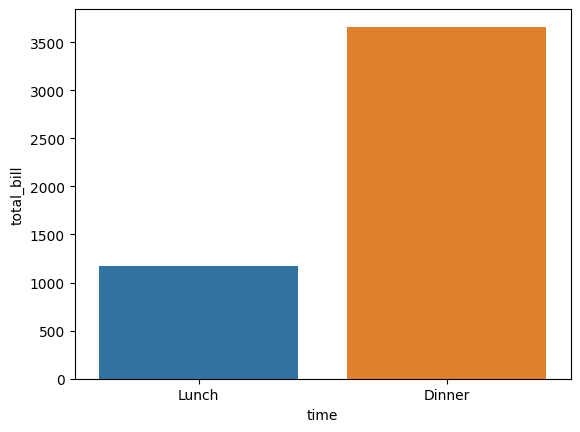

In [14]:
sns.barplot(data=tips, x='time', y='total_bill', hue='time', errorbar=None, estimator=sum); 
#estimator=sum để tính tổng các total_bill, rồi lấy tổng đó vẽ barplot (chứ không dùng giá trị trung bình cộng như mặc định)

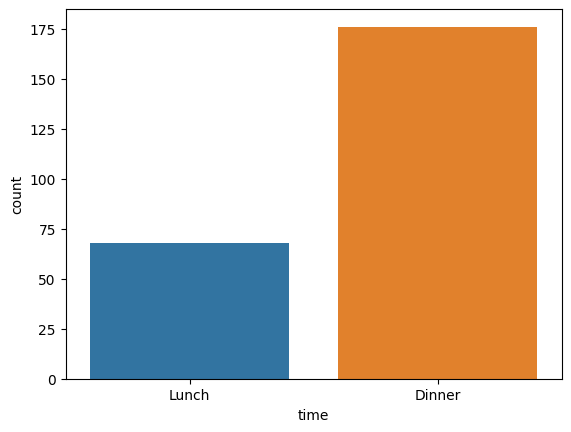

In [16]:
sns.countplot(data=tips, x='time', hue='time'); #Countplot để đếm giá trị ứng với từng nhóm, rồi dùng đó vẽ barplot
                                                #Ví dụ ở đây đếm xem có bao nhiêu người đến ăn bữa lunch, bao nhiêu ăn dinner
                                                #Rồi lấy số  đó để  vẽ barplot

In [24]:
df = tips.time.value_counts().to_frame().reset_index() #Đếm value_count của biến time, rồi xuất kết quả thành dataframe, đồng thời rs index
df

,time,count
0,Dinner,176
1,Lunch,68


In [26]:
df.rename(columns={'index':'time', 'time':'value'}, inplace=True) #Đổi lại tên cột. Đổi từ tên index -> time, rồi từ time->value
df                                                                 #inplace=True để thay đổi trực tiếp trên df hiện có

,value,count
0,Dinner,176
1,Lunch,68


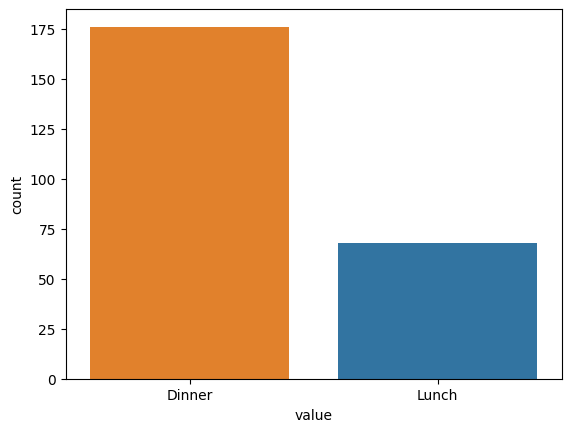

In [28]:
sns.barplot(data=df, x='value', y='count', hue='value', order=df.value); 
#order=df.value để  nó vẽ theo thứ tự của df.value, dinner trước rồi lunch

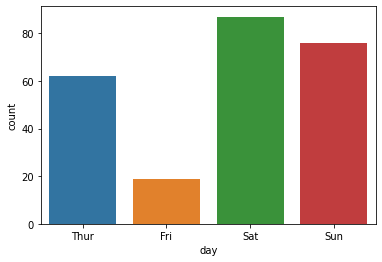

In [33]:
sns.countplot(data=tips, x='day'); #Vẽ count theo ngày trong tuần

In [30]:
df = tips.groupby('day').size().sort_values(ascending=True).to_frame().reset_index() #Sort theo giá trị count tăng dần, lưu vào dataframe
df.rename(columns={0:'value'}, inplace=True) #Đổi tên cột 0 thành tên "value"

/tmp/ipykernel_43291/3355172473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = tips.groupby('day').size().sort_values(ascending=True).to_frame().reset_index() #Sort theo giá trị count tăng dần, lưu vào dataframe


In [31]:
df

,day,value
0,Fri,19
1,Thur,62
2,Sun,76
3,Sat,87


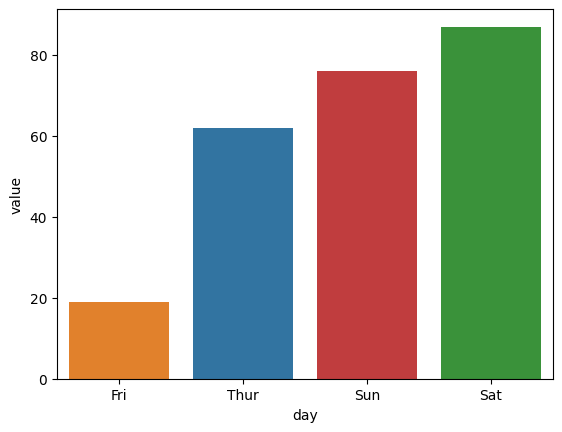

In [33]:
sns.barplot(data=df, x='day', y='value', order=df.day, hue='day');